# 1. Description of datasets and EDA

In [1]:
import pandas as pd
import numpy as np

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
def read(fn):
    with open(fn, "r") as f:
        d = f.readlines()
    print(d[0])
    return d

In [4]:
def sentence_lengths(dataset):
    return np.array([len(sentence.split(" ")) for sentence in dataset])

## 1.1 Corpus datasets for training

The "corpus" datasets are used to train word embedding models (i.e. unsupervised learning) to be able to get vectors representing words. The similarity of vectors then represent semantic association of words in the corpus. The corpuses are "from the wild" and should include examples of societal bias.

### 1.1.1 [BUG dataset](https://github.com/SLAB-NLP/BUG/blob/main/data.tar.gz) from the [paper](https://arxiv.org/pdf/2109.03858.pdf ):

In [5]:
dataset_BUG_stereotype = read("data/corpus/dataset_BUG_stereotype.txt")

"The clinical information of the deceased dentist was provided by his family members , one of whom was also one of the aforementioned 30 OHCWs ."



30.973599247274137 54203


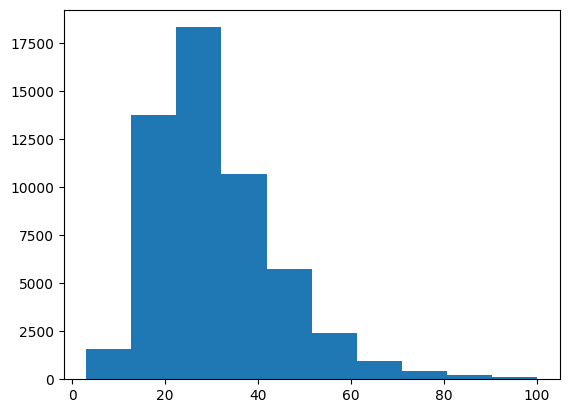

In [6]:
sl = sentence_lengths(dataset_BUG_stereotype)
print(sl.mean(), len(dataset_BUG_stereotype))
_ = plt.hist(sl)

### 1.1.2 [Doughman et al. dataset](https://github.com/jaddoughman/Gender-Bias-Datasets-Lexicons/blob/main/generic_pronouns/dataset.csv) from the [paper](https://arxiv.org/pdf/2201.08675.pdf):

In [7]:
dataset_doughman = read("data/corpus/dataset_doughman.txt")

"( all these are being observed , recorded by a rhymist by his/her deep thoughts and observations)."



18.24365916215446 3509


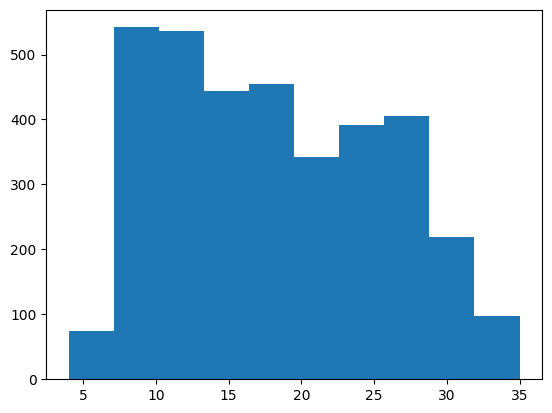

In [8]:
sl = sentence_lengths(dataset_doughman)
print(sl.mean(), len(dataset_doughman))
_ = plt.hist(sl)

### 1.1.3 [Wikipedia biographies](https://rlebret.github.io/wikipedia-biography-dataset/) dataset originally for text generation.

The merged dataset is what we will use, so that secondary sentences in biographies are kept with original primary sentences (for subject association).

In [9]:
dataset_wikibios_merged = read("data/corpus/dataset_wikibios_merged.txt")

leonard shenoff randle -lrb- born february 12 , 1949 -rrb- is a former major league baseball player . he was the first-round pick of the washington senators in the secondary phase of the june 1970 major league baseball draft , tenth overall .



96.96948049005864 728321


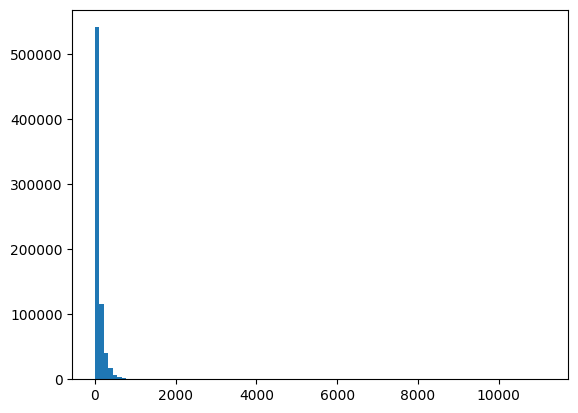

In [10]:
sl = sentence_lengths(dataset_wikibios_merged)
print(sl.mean(), len(dataset_wikibios_merged))
_ = plt.hist(sl, bins=100)# there's some really long wikibios in heres

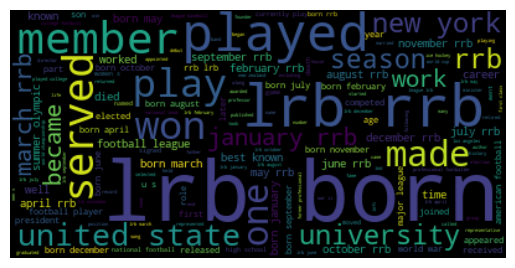

In [11]:
wordcloud = WordCloud().generate(" ".join(dataset_wikibios_merged))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 1.2 Lexicon datasets for testing

The "lexicon" datasets are used to test the inferred vectors embedding certain words. We expect that gender-bias associated words from psychological/sociological studies to be close to gendered words in the learnt vector representations.

Note that in all cases, 1 represents male bias, -1 represents female bias, 0 represents neutral/no bias.

### 1.2.1 Test lexicon
The first lexicon is a pure test-accuracy lexicon, to see if definitely gendered words and definitely un-gendered words are correctly classified.

In [12]:
df = pd.read_csv("data/lexicons/test_lexicon.csv")
df.head()

,word,label
0,he,1
1,him,1
2,his,1
3,father,1
4,fatherly,1


In [13]:
df["label"].value_counts()

 1    10
-1    10
 0    10
Name: label, dtype: int64

### 1.2.2 "Bias" lexicon
The second lexicon comes from the Gaucher et al., Konnikov et al. and Bem et al. papers and represent job advert words associated with gender bias and gender non-bias.

In [14]:
df = pd.read_csv("data/lexicons/bias_lexicon.csv")
df.head()

,word,label
0,active,1
1,adventurous,1
2,aggressive,1
3,ambitious,1
4,analytical,1


In [15]:
df["label"].value_counts()

 0    54
-1    52
 1    49
Name: label, dtype: int64

### 1.2.3 Google word2vec test dataset
We will also use the generic word2vec word embedding [test dataset from Google](https://raw.githubusercontent.com/RaRe-Technologies/gensim/develop/gensim/test/test_data/questions-words.txt) which is a non-specific test to see how good word embeddings are (in a generic sense). This is loaded into `gensim` easily.

### 1.2.4 Kainos specifications
We will use the Kainos job specifications to visualise what words may be biased. This is only for visualisation and not evaluation purposes.